In [3]:
##### Import all necessity functions for Machine Learning #####
import sys
import math
import string
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy as shc
import warnings
import zipfile
import cv2
import os
import re
import nltk
import random
import requests
from bs4 import BeautifulSoup
import re
from collections import Counter
from functools import reduce
from itertools import chain
from wordcloud import WordCloud
from google.colab.patches import cv2_imshow
from keras.preprocessing import image
from sklearn.metrics._plot.confusion_matrix import confusion_matrix
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.feature_selection import mutual_info_classif, mutual_info_regression, SelectKBest, chi2, VarianceThreshold
from imblearn.under_sampling import RandomUnderSampler, NearMiss
from imblearn.over_sampling import RandomOverSampler, SMOTE, SMOTEN, SMOTENC, SVMSMOTE, KMeansSMOTE, BorderlineSMOTE, ADASYN
from imblearn.ensemble import EasyEnsembleClassifier
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor, NearestNeighbors
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDClassifier, SGDRegressor, Perceptron
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.svm import SVC, SVR
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, ExtraTreeClassifier, ExtraTreeRegressor
from sklearn.ensemble import BaggingClassifier, BaggingRegressor, RandomForestClassifier, RandomForestRegressor, VotingClassifier, VotingRegressor
from sklearn.ensemble import AdaBoostClassifier, AdaBoostRegressor, GradientBoostingClassifier, GradientBoostingRegressor, StackingClassifier, StackingRegressor
from sklearn.metrics import classification_report, mean_absolute_error, mean_squared_error, r2_score, accuracy_score, recall_score, precision_score, f1_score, silhouette_score
from xgboost import XGBClassifier, XGBRegressor

##### Download keras #####
!pip install keras

##### Remove all warnings #####
import warnings
warnings.filterwarnings("ignore")

##### Import all necessity functions for Neural Network #####
import tensorflow as tf
from keras.models import Sequential, Model
from keras.utils import plot_model
from keras.layers import Dense, Conv2D, LSTM, GRU, RNN, Flatten, AvgPool2D, MaxPool2D, GlobalAveragePooling2D, BatchNormalization, Dropout, LeakyReLU, ELU, PReLU,  Embedding
from keras.activations import tanh, relu, sigmoid, softmax, swish
from keras.regularizers import L1, L2, L1L2
from keras.optimizers import SGD, Adagrad, Adadelta, RMSprop, Adam, Adamax, Nadam
from keras.initializers import HeNormal, HeUniform, GlorotNormal, GlorotUniform
from keras.losses import SparseCategoricalCrossentropy, CategoricalCrossentropy, hinge, MSE, MAE, Huber, BinaryCrossentropy
import keras.utils as image
from google.colab.patches import cv2_imshow
from keras.utils import plot_model

##### Plotting the confusion matrix #####
from mlxtend.evaluate import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import confusion_matrix

###### NLP Libraries ######

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

###### Download functions for nltk ######

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

######Checking the `GPU` that I am using

In [4]:
!nvidia-smi

Tue Jul  4 13:05:53 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   39C    P8     9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

###DB Review Scrapping

In [5]:
TEXT_STORE   = []
SCRAPED_TEXT = []
REVIEW_LIST  = []
PAGE_NUMBER = 604
for page in range(1, PAGE_NUMBER):
  r = requests.get('https://de.trustpilot.com/review/www.db.de?page={}'.format(page))
  soup = BeautifulSoup(r.text,'html.parser')

  for HTML_PARSER in soup.find_all('div', {'class': 'styles_mainContent__nFxAv'}):
    text = HTML_PARSER.find_all('p', {'class': 'typography_body-l__KUYFJ typography_appearance-default__AAY17 typography_color-black__5LYEn'})
    review = HTML_PARSER.find_all('div', {'star-rating_starRating__4rrcf star-rating_medium__iN6Ty'})
    for text, review in zip(text, review):
      SCRAPED_TEXT.append(text.get_text())
      REVIEW_LIST.append(review.img['alt'])

  print('Page # {} is completed'.format(page))

Page # 1 is completed
Page # 2 is completed
Page # 3 is completed
Page # 4 is completed
Page # 5 is completed
Page # 6 is completed
Page # 7 is completed
Page # 8 is completed
Page # 9 is completed
Page # 10 is completed
Page # 11 is completed
Page # 12 is completed
Page # 13 is completed
Page # 14 is completed
Page # 15 is completed
Page # 16 is completed
Page # 17 is completed
Page # 18 is completed
Page # 19 is completed
Page # 20 is completed
Page # 21 is completed
Page # 22 is completed
Page # 23 is completed
Page # 24 is completed
Page # 25 is completed
Page # 26 is completed
Page # 27 is completed
Page # 28 is completed
Page # 29 is completed
Page # 30 is completed
Page # 31 is completed
Page # 32 is completed
Page # 33 is completed
Page # 34 is completed
Page # 35 is completed
Page # 36 is completed
Page # 37 is completed
Page # 38 is completed
Page # 39 is completed
Page # 40 is completed
Page # 41 is completed
Page # 42 is completed
Page # 43 is completed
Page # 44 is complet

In [7]:
len(SCRAPED_TEXT)

6623

###Flix Train Scrapping

In [8]:
PAGE_NUMBERS = 106
for page in range(1, PAGE_NUMBERS):
  r = requests.get('https://de.trustpilot.com/review/flixtrain.com?page={}'.format(page))
  soup = BeautifulSoup(r.text,'html.parser')

  for HTML_PARSER in soup.find_all('div', {'class': 'styles_mainContent__nFxAv'}):
    text = HTML_PARSER.find_all('p', {'class': 'typography_body-l__KUYFJ typography_appearance-default__AAY17 typography_color-black__5LYEn'})
    review = HTML_PARSER.find_all('div', {'star-rating_starRating__4rrcf star-rating_medium__iN6Ty'})
    for text, review in zip(text, review):
      SCRAPED_TEXT.append(text.get_text())
      REVIEW_LIST.append(review.img['alt'])

  print('Page # {} is completed'.format(page))

Page # 1 is completed
Page # 2 is completed
Page # 3 is completed
Page # 4 is completed
Page # 5 is completed
Page # 6 is completed
Page # 7 is completed
Page # 8 is completed
Page # 9 is completed
Page # 10 is completed
Page # 11 is completed
Page # 12 is completed
Page # 13 is completed
Page # 14 is completed
Page # 15 is completed
Page # 16 is completed
Page # 17 is completed
Page # 18 is completed
Page # 19 is completed
Page # 20 is completed
Page # 21 is completed
Page # 22 is completed
Page # 23 is completed
Page # 24 is completed
Page # 25 is completed
Page # 26 is completed
Page # 27 is completed
Page # 28 is completed
Page # 29 is completed
Page # 30 is completed
Page # 31 is completed
Page # 32 is completed
Page # 33 is completed
Page # 34 is completed
Page # 35 is completed
Page # 36 is completed
Page # 37 is completed
Page # 38 is completed
Page # 39 is completed
Page # 40 is completed
Page # 41 is completed
Page # 42 is completed
Page # 43 is completed
Page # 44 is complet

In [9]:
len(SCRAPED_TEXT)

7936

###Flix Bus Scrapping

In [10]:
PAGE_NUMBERS = 388
for page in range(1, PAGE_NUMBERS):
  r = requests.get('https://de.trustpilot.com/review/flixbus.de?page={}'.format(page))
  soup = BeautifulSoup(r.text,'html.parser')

  for HTML_PARSER in soup.find_all('div', {'class': 'styles_mainContent__nFxAv'}):
    text = HTML_PARSER.find_all('p', {'class': 'typography_body-l__KUYFJ typography_appearance-default__AAY17 typography_color-black__5LYEn'})
    review = HTML_PARSER.find_all('div', {'star-rating_starRating__4rrcf star-rating_medium__iN6Ty'})
    for text, review in zip(text, review):
      SCRAPED_TEXT.append(text.get_text())
      REVIEW_LIST.append(review.img['alt'])

  print('Page # {} is completed'.format(page))

Page # 1 is completed
Page # 2 is completed
Page # 3 is completed
Page # 4 is completed
Page # 5 is completed
Page # 6 is completed
Page # 7 is completed
Page # 8 is completed
Page # 9 is completed
Page # 10 is completed
Page # 11 is completed
Page # 12 is completed
Page # 13 is completed
Page # 14 is completed
Page # 15 is completed
Page # 16 is completed
Page # 17 is completed
Page # 18 is completed
Page # 19 is completed
Page # 20 is completed
Page # 21 is completed
Page # 22 is completed
Page # 23 is completed
Page # 24 is completed
Page # 25 is completed
Page # 26 is completed
Page # 27 is completed
Page # 28 is completed
Page # 29 is completed
Page # 30 is completed
Page # 31 is completed
Page # 32 is completed
Page # 33 is completed
Page # 34 is completed
Page # 35 is completed
Page # 36 is completed
Page # 37 is completed
Page # 38 is completed
Page # 39 is completed
Page # 40 is completed
Page # 41 is completed
Page # 42 is completed
Page # 43 is completed
Page # 44 is complet

In [11]:
### Check the length of Scrapping data ###
print("Total scrapped = ", len(SCRAPED_TEXT))
print("Total scrapped = ", len(REVIEW_LIST))

Total scrapped =  8116
Total scrapped =  8116


In [12]:
### Text and review dataFrame ###
text   = pd.DataFrame(SCRAPED_TEXT, columns = ['text'])
review = pd.DataFrame(REVIEW_LIST,  columns = ['review'])

In [13]:
#### Create the dataFrame ####
df = pd.concat([text, review], axis = 1)
#### Show the data ####
df.head()

,text,review
0,Wann fahren bei DB eigentlich wieder Züge?? St...,Bewertet mit 1 von 5 Sternen
1,Ich buchte eine Bahnreise von Berlin nach Würz...,Bewertet mit 1 von 5 Sternen
2,Es würde mich interessieren wie es sein kann d...,Bewertet mit 1 von 5 Sternen
3,Wollte in Mailand den Nachtzug nach Süditalien...,Bewertet mit 1 von 5 Sternen
4,"Innerhalb 2 Monaten 200,- Euro für 1 Deutschla...",Bewertet mit 1 von 5 Sternen


In [14]:
#### Extract the only number from the review column ####
def get_review(_list):
  return _list[2]

#### Call the function ####
df.loc[:, 'new_review'] = df.loc[:, 'review'].apply(lambda x: x.split(" ")).apply(get_review)
#### Convert the column data type into int ####
df.loc[:, 'new_review'] = df.loc[:, 'new_review'].astype('int')
#### Show the dataFrame ####
df.head()

,text,review,new_review
0,Wann fahren bei DB eigentlich wieder Züge?? St...,Bewertet mit 1 von 5 Sternen,1
1,Ich buchte eine Bahnreise von Berlin nach Würz...,Bewertet mit 1 von 5 Sternen,1
2,Es würde mich interessieren wie es sein kann d...,Bewertet mit 1 von 5 Sternen,1
3,Wollte in Mailand den Nachtzug nach Süditalien...,Bewertet mit 1 von 5 Sternen,1
4,"Innerhalb 2 Monaten 200,- Euro für 1 Deutschla...",Bewertet mit 1 von 5 Sternen,1


In [15]:
#### Show the value counts ####
df.loc[:, 'new_review'].value_counts()

1    7598
5     209
2     156
4      81
3      72
Name: new_review, dtype: int64

In [16]:
#### Convert the target column ####
def sentiment(instance):
  if instance >=2:
    return "Positive"
  else:
    return "Negative"

df.loc[:, 'sentiment'] = df.loc[:, 'new_review'].apply(sentiment)

In [17]:
df.head()

,text,review,new_review,sentiment
0,Wann fahren bei DB eigentlich wieder Züge?? St...,Bewertet mit 1 von 5 Sternen,1,Negative
1,Ich buchte eine Bahnreise von Berlin nach Würz...,Bewertet mit 1 von 5 Sternen,1,Negative
2,Es würde mich interessieren wie es sein kann d...,Bewertet mit 1 von 5 Sternen,1,Negative
3,Wollte in Mailand den Nachtzug nach Süditalien...,Bewertet mit 1 von 5 Sternen,1,Negative
4,"Innerhalb 2 Monaten 200,- Euro für 1 Deutschla...",Bewertet mit 1 von 5 Sternen,1,Negative


In [18]:
#### Change the sentiment into Label Encoding ####
df.loc[:, 'sentiment'] = df.loc[:, 'sentiment'].map({"Positive": 1, "Negative": 0})

df.head()

,text,review,new_review,sentiment
0,Wann fahren bei DB eigentlich wieder Züge?? St...,Bewertet mit 1 von 5 Sternen,1,0
1,Ich buchte eine Bahnreise von Berlin nach Würz...,Bewertet mit 1 von 5 Sternen,1,0
2,Es würde mich interessieren wie es sein kann d...,Bewertet mit 1 von 5 Sternen,1,0
3,Wollte in Mailand den Nachtzug nach Süditalien...,Bewertet mit 1 von 5 Sternen,1,0
4,"Innerhalb 2 Monaten 200,- Euro für 1 Deutschla...",Bewertet mit 1 von 5 Sternen,1,0


In [19]:
df.loc[:, 'sentiment'].value_counts()

0    7598
1     518
Name: sentiment, dtype: int64

####Check `NaN` value presence or not

In [20]:
#### define a function for NaN check ####
def check_NaN(df):
  if df.empty:
    raise Exception('The DataFrame is empty'.capitalize())
  else:
    if df.isnull().sum().sum() > 0:
      return "NaN value presence in this dataset.".capitalize()
    else:
      return "No NaN value in this dataset.".capitalize()

#### Call the current function with this current directory ####
try:
  checking = check_NaN(df)
  print("The final outcome is: "+checking)
except Exception as e:
  print(e.with_traceback)

The final outcome is: No nan value in this dataset.


####Checking dataset contains `Imbalanced` dataset or not

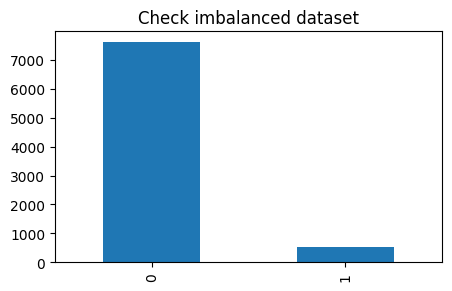

In [21]:
#### Define a function for checking the imbalanced condition of dataset ####
def check_imbalanced(df):
  if df.empty:
    raise Exception('DataFrame is empty'.capitalize())
  else:
    return df.loc[:, 'sentiment'].value_counts()

#### Call the current function with this current directory ####
try:
  seris = check_imbalanced(df)
except Exception as e:
  print(e.with_traceback)
else:
  plt.figure(figsize = (5, 3))
  plt.title('Check Imbalanced dataset'.capitalize())
  seris.plot(kind = 'bar')
  plt.show()

####Checking the `duplicate` instances presence or not

In [22]:
#### Define a function for checking the duplicate instances ####
def check_duplicate(df):
  if df.empty:
    raise Exception('DataFrame is empty'.capitalize())
  else:
    return df.duplicated().sum()

#### Call the current function with this current directory ####
try:
  duplicate_check = check_duplicate(df)
except Exception as e:
  print(e.with_traceback)
else:
  if duplicate_check == 0:
    print('There is No duplicated instances in this dataset'.capitalize())
  else:
    print('There is duplicated instances in this dataset'.capitalize())

There is duplicated instances in this dataset


####Checking the `info` of this dataset

In [23]:
#### Define a function for the displaying the info ####
def show_info(df):
  if df.empty:
    raise Exception('DataFrame is empty'.capitalize())
  else:
    print(df.info())

#### Call the current function with this current directory ####

try:
  show_info(df)
except Exception as e:
  print(e.with_traceback)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8116 entries, 0 to 8115
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   text        8116 non-null   object
 1   review      8116 non-null   object
 2   new_review  8116 non-null   int64 
 3   sentiment   8116 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 253.8+ KB
None


#####`Pre-processing` the dataset for finding the insights of the dataset

In [24]:
#### Do the copy of the orginal dataset ####
dummy_df = df.copy()

#### Display the dataset ####
dummy_df.head()

,text,review,new_review,sentiment
0,Wann fahren bei DB eigentlich wieder Züge?? St...,Bewertet mit 1 von 5 Sternen,1,0
1,Ich buchte eine Bahnreise von Berlin nach Würz...,Bewertet mit 1 von 5 Sternen,1,0
2,Es würde mich interessieren wie es sein kann d...,Bewertet mit 1 von 5 Sternen,1,0
3,Wollte in Mailand den Nachtzug nach Süditalien...,Bewertet mit 1 von 5 Sternen,1,0
4,"Innerhalb 2 Monaten 200,- Euro für 1 Deutschla...",Bewertet mit 1 von 5 Sternen,1,0


####Remove `HTML` or `Number` from the dataset - for analysis

In [25]:
#### define a function to remove the HTML format from the dataset ####
def removeHTML(record):
  CLEANR = re.compile('<.*?>')
  cleantext = re.sub('[^a-zA-Z]', ' ', record)
  return cleantext
try:
  df.loc[:, 'text'] = df.loc[:, 'text'].apply(removeHTML)
except Exception as e:
  print(e)
else:
  print(df.head())

                                                text  \
0  Wann fahren bei DB eigentlich wieder Z ge   St...   
1  Ich buchte eine Bahnreise von Berlin nach W rz...   
2  Es w rde mich interessieren wie es sein kann d...   
3  Wollte in Mailand den Nachtzug nach S ditalien...   
4  Innerhalb   Monaten       Euro f r   Deutschla...   

                         review  new_review  sentiment  
0  Bewertet mit 1 von 5 Sternen           1          0  
1  Bewertet mit 1 von 5 Sternen           1          0  
2  Bewertet mit 1 von 5 Sternen           1          0  
3  Bewertet mit 1 von 5 Sternen           1          0  
4  Bewertet mit 1 von 5 Sternen           1          0  


####Remove `Stopwords` from the dataset - for analysis

In [26]:
#### Define a function for remove the stopwords ####
def removestopwords(record):
  clean_text_ = []
  for word_ in word_tokenize(record):
    if word_ in stopwords.words('german'):
      pass
    else:
      clean_text_.append(word_)

  return ' '.join(clean_text_)

#### Call the current function with this current directory ####
try:
  df.loc[:, 'text'] = df.loc[:, 'text'].apply(removestopwords)
except Exception as e:
  print(e.with_traceback)
else:
  print(df.head())

                                                text  \
0  Wann fahren DB eigentlich Z ge Strecke Kiel Fl...   
1  Ich buchte Bahnreise Berlin W rzburg Im ICE Ba...   
2  Es w rde interessieren nachdem immer Z ge Ausf...   
3  Wollte Mailand Nachtzug S ditalien nehmen Muss...   
4  Innerhalb Monaten Euro f r Deutschlandticket A...   

                         review  new_review  sentiment  
0  Bewertet mit 1 von 5 Sternen           1          0  
1  Bewertet mit 1 von 5 Sternen           1          0  
2  Bewertet mit 1 von 5 Sternen           1          0  
3  Bewertet mit 1 von 5 Sternen           1          0  
4  Bewertet mit 1 von 5 Sternen           1          0  


In [27]:
import nltk
from nltk.stem.snowball import GermanStemmer

def german_stemming(text):
    stemmer = GermanStemmer()
    stemmed_words = [stemmer.stem(word) for word in nltk.word_tokenize(text)]
    return " ".join(stemmed_words)

#### Call the current function with this current directory ####
try:
  df.loc[:, 'text'] = df.loc[:, 'text'].apply(german_stemming)
except Exception as e:
  print(e.with_traceback)
else:
  print(df.head())

                                                text  \
0  wann fahr db eigent z ge streck kiel flensburg...   
1  ich bucht bahnreis berlin w rzburg im ice bamb...   
2  es w rde interessi nachd imm z ge ausfall ger ...   
3  wollt mailand nachtzug s ditali nehm musst eur...   
4  innerhalb monat euro f r deutschlandticket abo...   

                         review  new_review  sentiment  
0  Bewertet mit 1 von 5 Sternen           1          0  
1  Bewertet mit 1 von 5 Sternen           1          0  
2  Bewertet mit 1 von 5 Sternen           1          0  
3  Bewertet mit 1 von 5 Sternen           1          0  
4  Bewertet mit 1 von 5 Sternen           1          0  


###Convert Short form to its full form

In [28]:
def conversion_full_form(dummy_df):
  german_abbreviations = {
      "z.B.": "zum Beispiel",
      "u.a.": "unter anderem",
      "u.U.": "unter Umständen",
      "usw.": "und so weiter",
      "o.ä.": "oder ähnliches",
      "bzw.": "beziehungsweise",
      "etc.": "et cetera",
      "i.d.R.": "in der Regel",
      "ggf.": "gegebenenfalls",
      "ca.": "circa",
      "usf.": "und so fort",
      "d.h.": "das heißt",
      "vgl.": "vergleiche",
      "s.o.": "siehe oben",
      "s.u.": "siehe unten",
      "u.E.": "unseres Erachtens",
      "o.g.": "oben genannt",
      "n.a.": "nach Anfrage",
      "i.A.": "im Auftrag",
      "u.v.m.": "und vieles mehr",
      "z.Hd.": "zu Händen",
      "z.T.": "zum Teil",
      "i.V.m.": "in Verbindung mit",
      "usn.": "und so weiter",
      "usgl.": "usw. gleichermaßen",
      "inkl.": "inklusive",
      "exkl.": "exklusive",
      "evtl.": "eventuell",
      "jmd.": "jemand",
      "jdn.": "jemanden",
      "z.H.": "zu Händen",
      "u.Ä.": "und Ähnliches",
      "m.M.n.": "meiner Meinung nach",
      "u.V.": "unter Vorbehalt",
      "v.a.": "vor allem",
      "m.E.": "meines Erachtens",
      "vgl.": "vergleiche",
      "bzgl.": "bezüglich",
      "i.K.": "im Kontext",
      "u.w.": "und weiteres",
      "tlw.": "teilweise",
      "i.G.": "im Gegenteil",
      "s.z.": "soweit zutreffend",
      "i.A.w.": "im Auftrag von",
      "s.g.": "so genannt",
      "v.V.": "vor Versendung",
      "u.v.a.": "und vieles andere",
      "k.A.": "keine Ahnung",
      "n.v.": "nicht verfügbar",
      "u.K.": "und Konsorten",
      "s.d.R.": "soweit die Rede",
      "s.g.u.": "siehe genannte Unterlagen",
      "u.E.Z.": "unseres Erachtens zufolge",
  }

  clean_text = []
  for word in dummy_df:
    if word in german_abbreviations:
      clean_text.append(german_abbreviations[word])
    else:
      clean_text.append(word)

  return ''.join(clean_text)

#### Call this function with this directory ####
try:
  df.loc[:, 'text'] = df.loc[:, 'text'].apply(lambda x: conversion_full_form(x))
except Exception as e:
  print(e.args)
else:
  print('Short-form to abbrevation is done successfully'.capitalize())

Short-form to abbrevation is done successfully


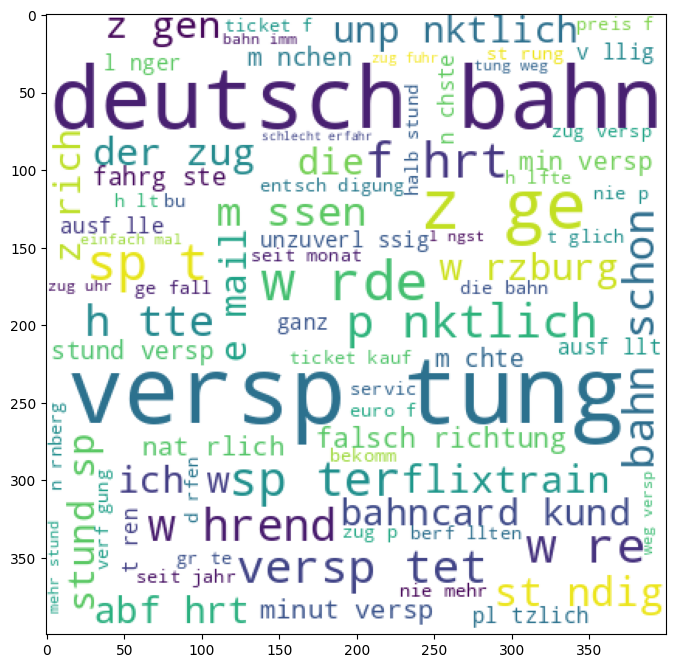

In [29]:
### Check the most frequent words in the Joy ###
plt.figure(figsize = (8, 12))
wordcloud_ = WordCloud(height = 400, width = 400, min_font_size = 8, background_color = 'white')
wordcloud_.generate(df.loc[df.loc[:, 'sentiment'] == 0, 'text'].str.cat(sep = ''))

plt.imshow(wordcloud_)

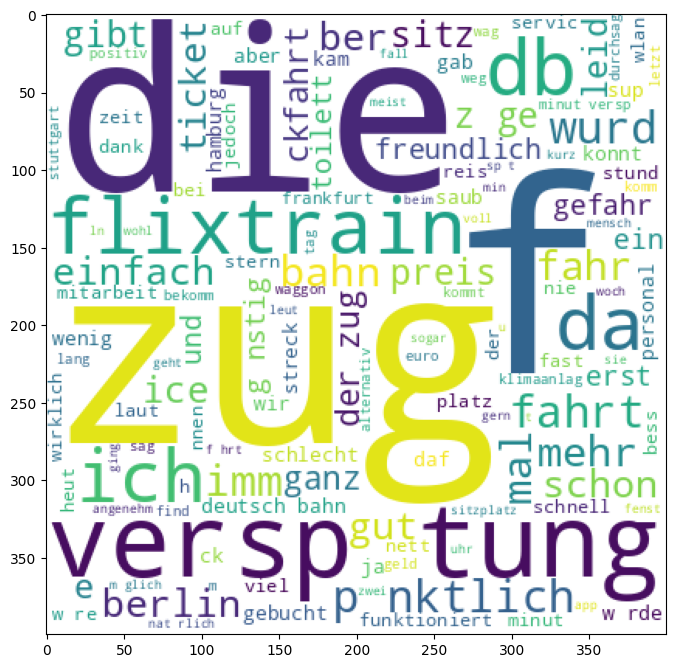

In [30]:
#### Check the most frequent words in the Joy ####
plt.figure(figsize = (8, 12))
wordcloud_ = WordCloud(height = 400, width = 400, min_font_size = 8, background_color = 'white')
wordcloud_.generate(df.loc[df.loc[:, 'sentiment'] == 1, 'text'].str.cat(sep = ''))

plt.imshow(wordcloud_)

###Make the data balanced ####

In [31]:
under = RandomUnderSampler(random_state = 42)
X, y = under.fit_resample(df.loc[:, 'text'].values.reshape(-1, 1), df.loc[:, 'sentiment'].values)

print("The shape of X is {}".format(X.shape))
print("The shape of Y is {}".format(y.shape))

The shape of X is (1036, 1)
The shape of Y is (1036,)


In [32]:
### Checking of random under sampling is done or not ####
text   = pd.DataFrame(X, columns = ['text'])
target = pd.DataFrame(y, columns = ['target'])

df = pd.concat([text, target], axis = 1)
df.head()

,text,target
0,wir vier vier platz speziell zuzahl f r person...,0
1,deutsch bahn da nix mehr deutsch unp nktlich z...,0
2,innerhalb monat euro f r deutschlandticket abo...,0
3,ich erfahr deutsch bahn erinn zufriedenstell e...,0
4,der kundenservic telefon wirklich mies ich ber...,0


In [33]:
#### Make the dataset into lowercase ####
df.loc[:, 'text'] = df.loc[:, 'text'].apply(lambda x: x.lower())

df.head()

,text,target
0,wir vier vier platz speziell zuzahl f r person...,0
1,deutsch bahn da nix mehr deutsch unp nktlich z...,0
2,innerhalb monat euro f r deutschlandticket abo...,0
3,ich erfahr deutsch bahn erinn zufriedenstell e...,0
4,der kundenservic telefon wirklich mies ich ber...,0


In [34]:
X = df.loc[:, 'text']
y = df.loc[:, 'target']

####`Split` the dataset into train and test

In [35]:
#### Define a function for splitting the dataset into train and test ####
def split_train_test(df):
  X_train, X_test, y_train, y_test = train_test_split(X, y,\
                                                      test_size = 0.20, random_state = 42)
  return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = split_train_test(df)

#### Display the shape of train and test ####
print('The shape of X_train is = {}'.format(np.array(X_train).shape),'\n')
print('The shape of y_train is = {}'.format(np.array(y_train).shape),'\n')
print('The shape of X_test is  = {}'.format(np.array(X_test).shape),'\n')
print('The shape of y_test is  = {}'.format(np.array(y_test).shape))

The shape of X_train is = (828,) 

The shape of y_train is = (828,) 

The shape of X_test is  = (208,) 

The shape of y_test is  = (208,)


#Install the `Transformers`

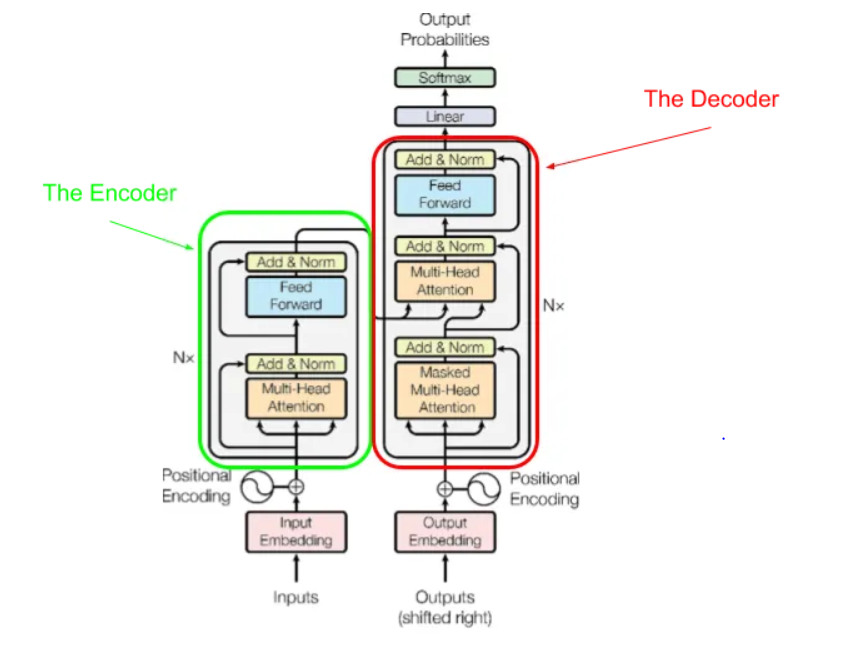


The link of `transformers` image:

 https://github.com/atikul-islam-sajib/200K-SHORT-TEXTS-FOR-HUMOR-DETECTION-for-Human-Resourceful-task-using-BERT---DistilBert---Update/blob/main/T1.png

https://github.com/atikul-islam-sajib/200K-SHORT-TEXTS-FOR-HUMOR-DETECTION-for-Human-Resourceful-task-using-BERT---DistilBert---Update/blob/main/T2.png




* Use `DistilBert` architecture to complete this `HUMOR` detection TASK


In [36]:
!pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 90.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.8/236.8 kB 28.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 116.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 84.4 MB/s eta 0:00:00


####Call the Tokenizer of `DistilBert` with respect to convert the train and test in an appropraite format.



* We will use `distilbert-base-uncased` model for this `HUMOR DETECTION` problem. Because, DistilBert is `lighter, cheaper, smaller, and Faster` and able to provide the equivalent performance as like BERT. In shorts, DistilBert using BERT architecture in the concept of `distillation the knowledge`.*


* Using `DistilBert` - `distilbert-base-uncased` containing 6 layers, 768-heads, 65M parameters.

* The link of `DistilBERT` architecture is: https://github.com/atikul-islam-sajib/200K-SHORT-TEXTS-FOR-HUMOR-DETECTION-for-Human-Resourceful-task-using-BERT---DistilBert---Update/blob/main/unnamed.jpg

In [37]:
from transformers import DistilBertTokenizerFast
tokenizer = DistilBertTokenizerFast.from_pretrained('distilbert-base-uncased')

try:
  train_encodings = tokenizer(list(X_train), padding = 'max_length', truncation = True, max_length = 500)
  test_encodings  = tokenizer(list(X_test),  padding = 'max_length', truncation = True, max_length = 500)
except SyntaxError as e:
  print(e.with_traceback)
else:
  print(train_encodings.keys())
  print(test_encodings.keys())

dict_keys(['input_ids', 'attention_mask'])
dict_keys(['input_ids', 'attention_mask'])


####Convert `encodings` with respect to Dataset Objects

* We will convert those into `tensor` because we are going to use `TensorFlow`

In [38]:
import tensorflow as tf
#### Define a function that is able to convert the dataset-object ####
def convert_dataset_object(df):
  if df.empty:
    raise Exception('DataFrame is empty'.capitalize())
  else:
    #### For the training dataset ####
    train_dataset = tf.data.Dataset.from_tensor_slices((
        dict(train_encodings),
        y_train
    ))
    #### For the testing dataset ####
    test_dataset = tf.data.Dataset.from_tensor_slices((
        dict(test_encodings),
        y_test
    ))

    return train_dataset, test_dataset

#### Call this function with this current directory ####
try:
  train_dataset, test_dataset = convert_dataset_object(df)
except Exception as e:
  print(e.with_traceback)
except TypeError as e:
  print(e)
else:
  print('Conversion into Dataset objects is done successfully'.capitalize())

Conversion into dataset objects is done successfully


####Do the `Hyper Parameter Tuning` to find the best `Arguments` for the `DistilBert`.

* Define some value with respect to the arguments and check which one is able to provide the best model performance. I used few paramters due to `memory` issue.

In [39]:
#### Define some parameters with respect to the DistilBert ####
num_train_epochs = [2, 3]
per_device_train_batch_size = [8]
per_device_eval_batch_size = [16, 64]
eval_steps = [2]

#### Make the Combinations ####
import itertools

list_combined = [num_train_epochs,\
                 per_device_train_batch_size,\
                 per_device_eval_batch_size ,\
                 eval_steps]

combinations = list(itertools.product(*list_combined))

#### Print the combinations ####
print(combinations)

[(2, 8, 16, 2), (2, 8, 64, 2), (3, 8, 16, 2), (3, 8, 64, 2)]


In [40]:
from transformers import TFDistilBertForSequenceClassification, TFTrainer, TFTrainingArguments
#### Define an empty dictionary ####
dict_evaluation_matrix = {}
#### Define a function that is responsible for the finding the best Param ####
def find_best_arguments(df):
  if df.empty:
    raise Exception('DataFrame is empty'.capitalize())
  else:

    for index, each_combination in enumerate(combinations):
      print('{} comination is running'.format(index + 1))

      training_args = TFTrainingArguments(
        #### output directory ####
        output_dir='./results-check',
        #### total number of training epochs ####
        num_train_epochs = each_combination[0],
        #### batch size per device during training ####
        per_device_train_batch_size = each_combination[1],
        #### batch size for evaluation ####
        per_device_eval_batch_size = each_combination[2],
        #### number of warmup steps for learning rate scheduler ####
        warmup_steps = 500,
        #### strength of weight decay ####
        weight_decay = 0.01,
        #### directory for storing logs ####
        logging_dir = './logs-check',
        #### Logging steps ####
        logging_steps = 10,
        #### Eval_steps ####
        eval_steps = each_combination[3]
      )
      #### Call the model of DistilBert ####
      with training_args.strategy.scope():
        model = TFDistilBertForSequenceClassification.from_pretrained("distilbert-base-uncased")

      #### This is responsible to train the DistilBert ####
      trainer = TFTrainer(
        #### the instantiated Transformers model to be trained ####
        model = model,
        #### training arguments, defined above ####
        args = training_args,
        #### training dataset ####
        train_dataset = train_dataset,
        ### evaluation dataset ####
        eval_dataset = test_dataset
      )

      #### This is responsible for training ####
      trainer.train()

      #### Predict the Model ####

      output = trainer.predict(test_dataset)[0]
      output = np.argmax(output, axis = -1)

      # Set a threshold value (e.g., 0.5) to determine the class label
      threshold = 0.5
      output = np.where(output > threshold, 1, 0)

      #### Print the Evalution Matrix ####
      print(accuracy_score(output, y_test))
      print(precision_score(output, y_test))
      print(recall_score(output, y_test))
      print(f1_score(output, y_test))

      #### Store this into a dictionary for further use ####
      dict_evaluation_matrix[index] = [accuracy_score(output, y_test)]

      print('\n\n')

try:
  dict_eval_matrix = find_best_arguments(df)
except Exception as e:
  print(e)
else:
  print('The dictonary contains: {}\n'.format(dict_eval_matrix))

1 comination is running


Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFDistilBertForSequenceClassification: ['vocab_layer_norm.bias', 'vocab_layer_norm.weight', 'vocab_projector.bias', 'vocab_transform.bias', 'vocab_transform.weight']
- This IS expected if you are initializing TFDistilBertForSequenceClassification from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertForSequenceClassification from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
Some weights or buffers of the TF 2.0 model TFDistilBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['pre_classifier.weight', 'pre_classifier.bias', 'classifier.weight', 'classifier.bias']
You should 

0.7403846153846154
0.6857142857142857
0.7741935483870968
0.7272727272727272



2 comination is running


Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFDistilBertForSequenceClassification: ['vocab_layer_norm.bias', 'vocab_layer_norm.weight', 'vocab_projector.bias', 'vocab_transform.bias', 'vocab_transform.weight']
- This IS expected if you are initializing TFDistilBertForSequenceClassification from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertForSequenceClassification from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
Some weights or buffers of the TF 2.0 model TFDistilBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['pre_classifier.weight', 'pre_classifier.bias', 'classifier.weight', 'classifier.bias']
You should 

0.7259615384615384
0.7047619047619048
0.74
0.7219512195121951



3 comination is running


Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFDistilBertForSequenceClassification: ['vocab_layer_norm.bias', 'vocab_layer_norm.weight', 'vocab_projector.bias', 'vocab_transform.bias', 'vocab_transform.weight']
- This IS expected if you are initializing TFDistilBertForSequenceClassification from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertForSequenceClassification from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
Some weights or buffers of the TF 2.0 model TFDistilBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['pre_classifier.weight', 'pre_classifier.bias', 'classifier.weight', 'classifier.bias']
You should 

0.7211538461538461
0.9142857142857143
0.6620689655172414
0.768



4 comination is running


Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFDistilBertForSequenceClassification: ['vocab_layer_norm.bias', 'vocab_layer_norm.weight', 'vocab_projector.bias', 'vocab_transform.bias', 'vocab_transform.weight']
- This IS expected if you are initializing TFDistilBertForSequenceClassification from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertForSequenceClassification from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
Some weights or buffers of the TF 2.0 model TFDistilBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['pre_classifier.weight', 'pre_classifier.bias', 'classifier.weight', 'classifier.bias']
You should 

0.7211538461538461
0.9142857142857143
0.6620689655172414
0.768



The dictonary contains: None



####Do the `KFold` Cross validation with respect to `K`- value = 3.

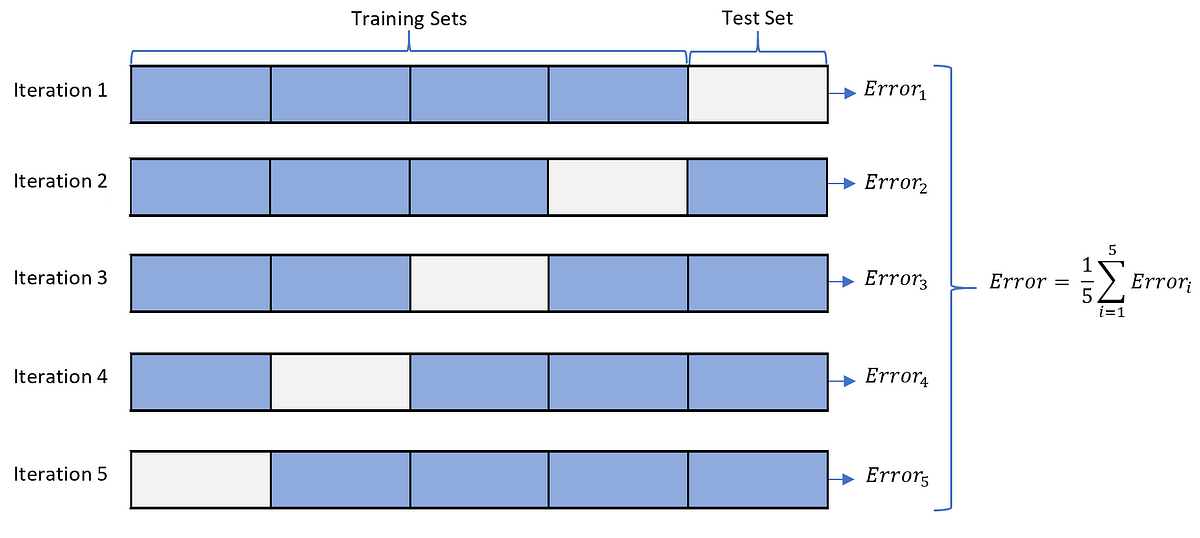

* K - value `3` because if we increase K-value the `memory issue` comes and it would be `computationaly expensive` for this model.



Cross validation is 1 running 



Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFDistilBertForSequenceClassification: ['vocab_layer_norm.bias', 'vocab_layer_norm.weight', 'vocab_projector.bias', 'vocab_transform.bias', 'vocab_transform.weight']
- This IS expected if you are initializing TFDistilBertForSequenceClassification from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertForSequenceClassification from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
Some weights or buffers of the TF 2.0 model TFDistilBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['pre_classifier.weight', 'pre_classifier.bias', 'classifier.weight', 'classifier.bias']
You should 

The accuracy score  =  0.7355769230769231
The precision score =  0.7238095238095238
The recall score =  0.7450980392156863
The f1_score score =  0.7342995169082125
************************************************************************************************************************ 

The confusion Matrix is given below:



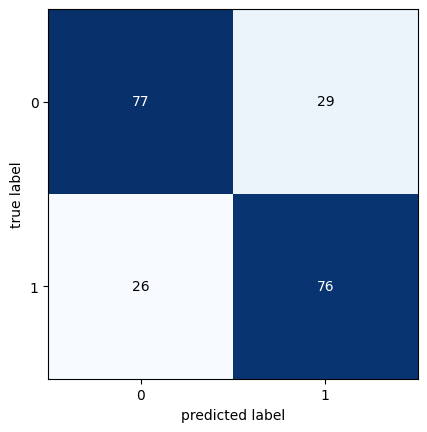

Cross validation is 2 running 



Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFDistilBertForSequenceClassification: ['vocab_layer_norm.bias', 'vocab_layer_norm.weight', 'vocab_projector.bias', 'vocab_transform.bias', 'vocab_transform.weight']
- This IS expected if you are initializing TFDistilBertForSequenceClassification from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertForSequenceClassification from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
Some weights or buffers of the TF 2.0 model TFDistilBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['pre_classifier.weight', 'pre_classifier.bias', 'classifier.weight', 'classifier.bias']
You should 

The accuracy score  =  0.7246376811594203
The precision score =  0.7894736842105263
The recall score =  0.6696428571428571
The f1_score score =  0.7246376811594203
************************************************************************************************************************ 

The confusion Matrix is given below:



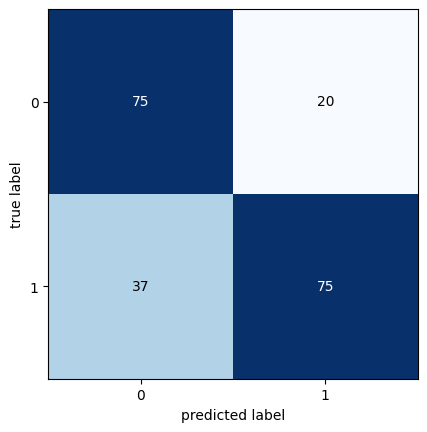

Cross validation is 3 running 



Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFDistilBertForSequenceClassification: ['vocab_layer_norm.bias', 'vocab_layer_norm.weight', 'vocab_projector.bias', 'vocab_transform.bias', 'vocab_transform.weight']
- This IS expected if you are initializing TFDistilBertForSequenceClassification from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertForSequenceClassification from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
Some weights or buffers of the TF 2.0 model TFDistilBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['pre_classifier.weight', 'pre_classifier.bias', 'classifier.weight', 'classifier.bias']
You should 

The accuracy score  =  0.7536231884057971
The precision score =  0.9368421052631579
The recall score =  0.664179104477612
The f1_score score =  0.777292576419214
************************************************************************************************************************ 

The confusion Matrix is given below:



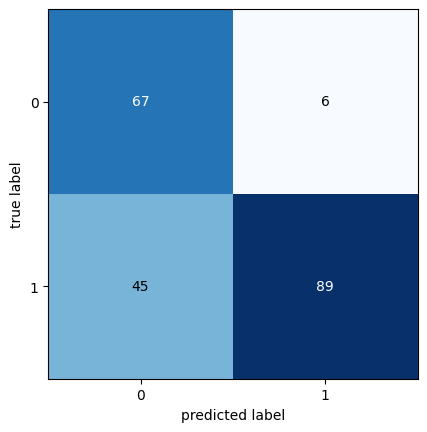

Cross validation is 4 running 



Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFDistilBertForSequenceClassification: ['vocab_layer_norm.bias', 'vocab_layer_norm.weight', 'vocab_projector.bias', 'vocab_transform.bias', 'vocab_transform.weight']
- This IS expected if you are initializing TFDistilBertForSequenceClassification from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertForSequenceClassification from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
Some weights or buffers of the TF 2.0 model TFDistilBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['pre_classifier.weight', 'pre_classifier.bias', 'classifier.weight', 'classifier.bias']
You should 

The accuracy score  =  0.7729468599033816
The precision score =  0.7946428571428571
The recall score =  0.7876106194690266
The f1_score score =  0.7911111111111111
************************************************************************************************************************ 

The confusion Matrix is given below:



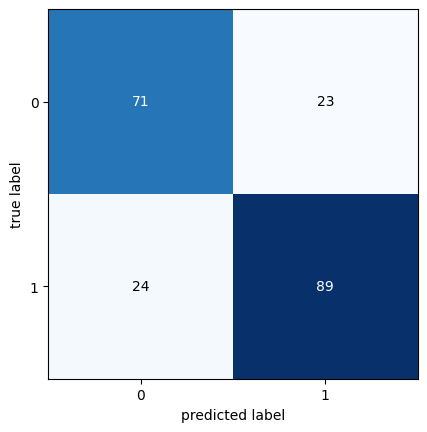

Cross validation is 5 running 



Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFDistilBertForSequenceClassification: ['vocab_layer_norm.bias', 'vocab_layer_norm.weight', 'vocab_projector.bias', 'vocab_transform.bias', 'vocab_transform.weight']
- This IS expected if you are initializing TFDistilBertForSequenceClassification from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertForSequenceClassification from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
Some weights or buffers of the TF 2.0 model TFDistilBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['pre_classifier.weight', 'pre_classifier.bias', 'classifier.weight', 'classifier.bias']
You should 

The accuracy score  =  0.7294685990338164
The precision score =  0.990990990990991
The recall score =  0.6666666666666666
The f1_score score =  0.7971014492753623
************************************************************************************************************************ 

The confusion Matrix is given below:



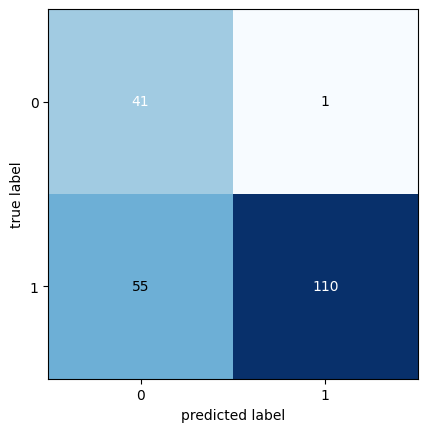

In [41]:
Kfold = KFold(n_splits = 5, shuffle = True, random_state = 42)
acc, pre, recall, f1 = [], [], [], []
count = 1
for train_index, test_index in Kfold.split(X):

  print('Cross validation is {} running'.format(count),'\n')

  X = np.array(X)
  y = np.array(y)

  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]

  X = list(X)
  y = list(y)

  train_encodings = tokenizer(list(X_train), padding = 'max_length', truncation=True, max_length = 610)
  test_encodings  = tokenizer(list(X_test),  padding = 'max_length', truncation=True, max_length = 610)

  train_dataset = tf.data.Dataset.from_tensor_slices((
    dict(train_encodings),
    y_train
  ))

  test_dataset = tf.data.Dataset.from_tensor_slices((
      dict(test_encodings),
      y_test
  ))

  from transformers import TFDistilBertForSequenceClassification, TFTrainer, TFTrainingArguments

  training_args = TFTrainingArguments(
      output_dir = './results',          # output directory
      num_train_epochs = 2,              # total number of training epochs
      per_device_train_batch_size = 8,   # batch size per device during training
      per_device_eval_batch_size = 16,   # batch size for evaluation
      warmup_steps = 500,                # number of warmup steps for learning rate scheduler
      weight_decay = 0.01,               # strength of weight decay
      logging_dir = './logs',            # directory for storing logs
      logging_steps = 10,
      eval_steps = 2
  )

  with training_args.strategy.scope():
    model = TFDistilBertForSequenceClassification.from_pretrained("distilbert-base-uncased")

  trainer = TFTrainer(
    model = model,                         # the instantiated Transformers model to be trained
    args = training_args,                  # training arguments, defined above
    train_dataset = train_dataset,         # training dataset
    eval_dataset  = test_dataset           # evaluation dataset
  )

  trainer.train()

  output = trainer.predict(test_dataset)[0]
  output = np.argmax(output, axis = -1)

  # Set a threshold value (e.g., 0.5) to determine the class label
  THRESHOLD = 0.5
  output = np.where(output > THRESHOLD, 1, 0)

  print("The accuracy score  = ", accuracy_score(output, y_test))
  print("The precision score = ",precision_score(output, y_test))
  print("The recall score = ",recall_score(output, y_test))
  print("The f1_score score = ",f1_score(output, y_test))

  print('*'*120,'\n')

  print('The confusion Matrix is given below:\n')

  confusion_mat = confusion_matrix(output, y_test)

  fig, ax = plot_confusion_matrix(conf_mat = confusion_mat)

  plt.show()

  acc.append(accuracy_score(output, y_test))
  pre.append(precision_score(output, y_test))
  recall.append(recall_score(output, y_test))
  f1.append(f1_score(output, y_test))

  count = count + 1

In [42]:
#### Show the Evaluation Matrix after using KFold -3 ####
print('Using KFold - 3, the accuracy of this model is {}'.format(np.array(acc).mean()),'\n')
print('Using KFold - 3, the precision of this model is {}'.format(np.array(pre).mean()),'\n')
print('Using KFold - 3, the recall of this model is {}'.format(np.array(recall).mean()),'\n')
print('Using KFold - 3, the f1 score of this model is {}'.format(np.array(f1).mean()))

Using KFold - 3, the accuracy of this model is 0.7432506503158677 

Using KFold - 3, the precision of this model is 0.8471518322834113 

Using KFold - 3, the recall of this model is 0.7066394573943697 

Using KFold - 3, the f1 score of this model is 0.7648884669746641


#For `Single Data` Prediction

In [57]:
from transformers import DistilBertTokenizerFast
tokenizer = DistilBertTokenizerFast.from_pretrained('distilbert-base-uncased')

class humor_prediction:

  def __init__(self, text):
    print('\n\nThe Prediction is Given below'.title())
    print('*'*70,'\n\n')
    self.text = text
    self.text_preprocessing()

  def text_preprocessing(self):
    preprocessing = tf.data.Dataset.from_tensor_slices((
      dict(tokenizer((self.text),\
                     padding = 'max_length',\
                     truncation=True,\
                     max_length = 50)),
                     [1]
          ))

    self.prediction(preprocessing)

  def prediction(self, preprocessing_result):
    output = trainer.predict(preprocessing_result)[0]
    output = np.argmax(output, axis = -1)
    if output[0] == 0:
      print("The prediction is Negative".capitalize())
    else:
      print("The prediction is Positive".capitalize())

#### Call the class and predict the model ####
try:
  print('Welcome to the detect Humor'.title())
  print('*'*70,'\n')
  text = (str(input("Enter the text:\n\n")))
except NameError as e:
  print(e.with_traceback)
else:
  humor_detect = humor_prediction([text])

Welcome To The Detect Humor
********************************************************************** 

Enter the text:

Der DB-Service ist recht gut


The Prediction Is Given Below
********************************************************************** 


The prediction is positive


#Use `LSTM` - to solve this Problem - It is `APART`from the test task. It's done for my `analysis purpose`

* Use it For understanding how our `RNN` - `LSTM` variants react with respect to this dataset.

In [44]:
#### Show the dummy_df dataset ####
df.head()

,text,target
0,wir vier vier platz speziell zuzahl f r person...,0
1,deutsch bahn da nix mehr deutsch unp nktlich z...,0
2,innerhalb monat euro f r deutschlandticket abo...,0
3,ich erfahr deutsch bahn erinn zufriedenstell e...,0
4,der kundenservic telefon wirklich mies ich ber...,0


In [45]:
##### Find the number of unique vocabulary in this dataframe ######
from tensorflow.keras.preprocessing.text import one_hot, Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

class TokenException(Exception):
  def __init__(self, message):
    self.message = message.capitalize()
try:
  tokenizer = Tokenizer()
  tokenizer.fit_on_texts(df.loc[:, 'text'])
  voc_size = tokenizer.word_index
  voc_size = len(voc_size) + 1

except TokenException as e:
  print(e)
else:
  print("# of unique vocabulary size in this dataframe is : ", voc_size)

# of unique vocabulary size in this dataframe is :  5904


In [46]:
##### One Hot Representation #####
def OHE(df):
  return [one_hot(record, voc_size) for record in df.loc[:, 'text']]

one_hot = OHE(df)

In [47]:
##### Find the maxlen of the list #####
maxlen = -1
for list in one_hot:
  if len(list) > maxlen:
    maxlen = len(list)
  else:
    pass

print("The maximum length of this list = ", maxlen)

The maximum length of this list =  428


In [48]:
##### Embedded doc #####
embedded_doc = pad_sequences(one_hot, padding = 'pre', maxlen = maxlen + 1)

print(embedded_doc)

[[   0    0    0 ... 1109 2483 5365]
 [   0    0    0 ... 3661 5903 5775]
 [   0    0    0 ... 4305 1063 1474]
 ...
 [   0    0    0 ... 2071 3976 2165]
 [   0    0    0 ... 2930   36 4833]
 [   0    0    0 ... 3789 2459 3083]]


In [49]:
###### Split the dataset into train and test #######
X_train, X_test, y_train, y_test = train_test_split(embedded_doc,\
                                                    df.loc[:, 'target'],\
                                                    test_size = 0.20,\
                                                    random_state = 42)

print("X_train shape is = ", X_train.shape)
print("y_train shape is = ", y_train.shape)
print("X_test  shape is = ", X_test.shape)
print("y_test  shape is = ", y_test.shape)

X_train shape is =  (828, 429)
y_train shape is =  (828,)
X_test  shape is =  (208, 429)
y_test  shape is =  (208,)


####`LSTM` used to predict the model #####

In [50]:
class activation_exception(Exception):
  def __init__(self, message):
    self.message = message.capitalize()

def LSTM_MODEL(activated = None):

  if activated == True:
    model = Sequential()
    ##### Create an embedded layer #####
    model.add(Embedding(input_dim = voc_size, output_dim = 300, input_length = maxlen + 1))
    model.add(Dropout(0.6))

    ##### Create LSTM with 100 neurons #####
    model.add(LSTM(units = 16))
    model.add(Dropout(0.7))

    model.add(Dense(units = 64, activation = 'relu', kernel_initializer = 'he_normal'))
    model.add(Dropout(rate = 0.9))

    ##### Create an output layer #####
    model.add(Dense(units = 1, activation = 'sigmoid'))

    ##### Compile the model #####
    model.compile(optimizer = Adam(learning_rate = 0.0001), loss = BinaryCrossentropy(), metrics = ['accuracy'])

    ##### Fit the model and run #####
    history_ = model.fit(x = X_train, y = y_train, validation_data = (X_test, y_test), epochs = 20, batch_size = 32, verbose = 1)
  else:
    raise Exception('Activated is not possible, Try again !'.capitalize())

  return history_, model

try:
  history_, model_LSTM = LSTM_MODEL(activated = True)
except activation_exception as message:
  print(message)

Epoch 1/20
26/26 [==============================] - 4s 43ms/step - loss: 0.6981 - accuracy: 0.5060 - val_loss: 0.6923 - val_accuracy: 0.5192
Epoch 2/20
26/26 [==============================] - 0s 18ms/step - loss: 0.6989 - accuracy: 0.4879 - val_loss: 0.6911 - val_accuracy: 0.5337
Epoch 3/20
26/26 [==============================] - 0s 16ms/step - loss: 0.6939 - accuracy: 0.5072 - val_loss: 0.6900 - val_accuracy: 0.5673
Epoch 4/20
26/26 [==============================] - 0s 17ms/step - loss: 0.7017 - accuracy: 0.4771 - val_loss: 0.6888 - val_accuracy: 0.6202
Epoch 5/20
26/26 [==============================] - 0s 17ms/step - loss: 0.6954 - accuracy: 0.4903 - val_loss: 0.6875 - val_accuracy: 0.6298
Epoch 6/20
26/26 [==============================] - 0s 16ms/step - loss: 0.6851 - accuracy: 0.5519 - val_loss: 0.6860 - val_accuracy: 0.6394
Epoch 7/20
26/26 [==============================] - 0s 16ms/step - loss: 0.6851 - accuracy: 0.5604 - val_loss: 0.6843 - val_accuracy: 0.6538
Epoch 8/20
26

####Check the Performance of LSTM

In [51]:
y_pred = [1 if predicted > 0.5 else 0 for predicted in model_LSTM.predict(X_test)]

print("Using LSTM, accuracy is   = ", accuracy_score(y_pred, y_test))
print("Using LSTM, recall is     = ", recall_score(y_pred, y_test))
print("Using LSTM, precision is  = ", precision_score(y_pred, y_test))
print("Using LSTM, f1 score is   = ", f1_score(y_pred, y_test))

7/7 [==============================] - 0s 10ms/step
Using LSTM, accuracy is   =  0.7067307692307693
Using LSTM, recall is     =  0.6896551724137931
Using LSTM, precision is  =  0.7619047619047619
Using LSTM, f1 score is   =  0.7239819004524887


In [52]:
#### Print the classification matrix ####
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.65      0.73      0.69        92
           1       0.76      0.69      0.72       116

    accuracy                           0.71       208
   macro avg       0.71      0.71      0.71       208
weighted avg       0.71      0.71      0.71       208



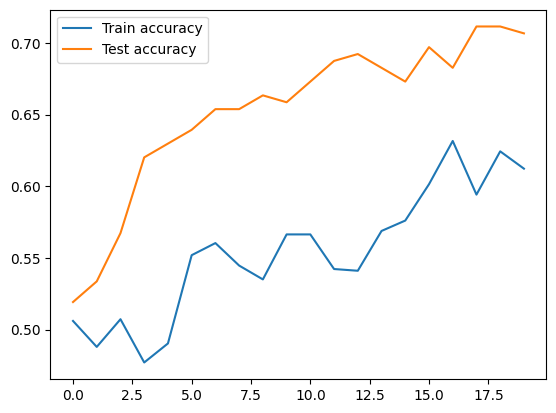

In [53]:
###### plot the accuracy and val_accuracy ######
plt.plot(history_.history['accuracy'], label = 'Train accuracy')
plt.plot(history_.history['val_accuracy'], label = 'Test accuracy')
plt.legend()
plt.show()

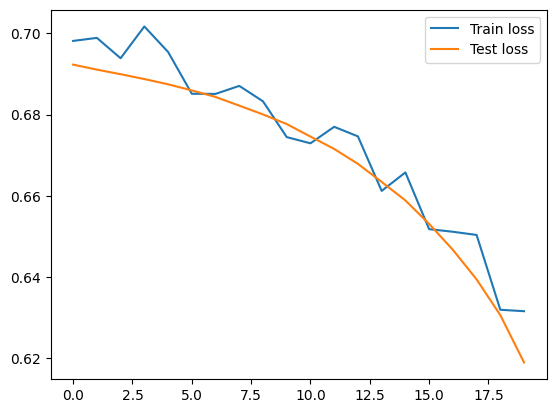

In [54]:
###### plot the train loss and validation loss ######
plt.plot(history_.history['loss'], label = 'Train loss')
plt.plot(history_.history['val_loss'], label = 'Test loss')
plt.legend()
plt.show()

In [55]:
!pip install colorama

#Comments after Building the Model & Using the `DistilBert & LSTM`

In [56]:
import colorama
from colorama import Fore

print("It is clearly see that "+ Fore.RED + 'Distilbert Model performace '+ "is outperfomred than LSTM Model".title())

It is clearly see that Distilbert Model performace Is Outperfomred Than Lstm Model
